In [764]:
import pickle
import pathlib

import numpy as np
import pandas as pd
import seaborn as sns

In [765]:
DATA_DIR = pathlib.Path.cwd().parent / 'data'
print(DATA_DIR)

c:\Users\Alan Matheus\Desktop\ayres\ames-1\data


In [766]:
clean_data_path = DATA_DIR / 'processed' / 'ames_clean.pkl'

In [767]:
with open(clean_data_path, 'rb') as file:
    data = pickle.load(file)

In [768]:
data = data.copy()

In [769]:
import numpy as np

# 1. Criação de Variáveis Combinadas
# Área Total da Casa
data['TotalSF'] = data['X1st.Flr.SF'] + data['X2nd.Flr.SF'] + data['Total.Bsmt.SF']

# Total de Banheiros
data['TotalBath'] = data['Full.Bath'] + 0.5 * data['Half.Bath'] + data['Bsmt.Full.Bath'] + 0.5 * data['Bsmt.Half.Bath']

# # 2. Transformações Matemáticas
# # Log da Área Total
data['TotalSFLog'] = np.log(data['TotalSF'])

# data['Overall_QualCond'] = data[['Overall.Qual', 'Overall.Cond']].mean(axis=1)

#take Gr.Liv.Area less than 4000
data = data[data['Gr.Liv.Area'] < 4000]
# aplicar_log = ["Wood.Deck.SF", "Open.Porch.SF", "Remod.Age", "Mas.Vnr.Area", "Bsmt.Unf.SF", "BsmtFin.SF.1", 'X1st.Flr.SF', 'X2nd.Flr.SF', 'Total.Bsmt.SF', 'TotalSF', 'Lot.Area', 'Lot.Frontage', 'Gr.Liv.Area', 'Garage.Area', 'Garage.Cars', 'TotalBath']
# for col in aplicar_log:
#     data[col] = np.log1p(data[col])


# data['Gr.Liv.Area'] = np.log1p(data['Gr.Liv.Area'])


# data['Garage.CarsPerArea'] = data['Garage.Cars'] / data['Garage.Area'] 
# data['Garage.CarsPerArea'] = data['Garage.CarsPerArea'].fillna(value=0)
# data['DecadeBuilt'] = (data['Year.Built'] // 10) * 10


# columns_to_drop =  ['Misc.Val']
# data = data.drop(columns=columns_to_drop)

# # standalize columns
# for column in columns_to_standardize:
#     data[column] = (data[column] - data[column].mean()) / data[column].std()

# 4. Interação entre Variáveis

# Interação entre Qualidade e Condição

# data["Overall.Grade"] = data["Overall.Qual"] * data["Overall.Cond"]
# data["Garage.Grade"] = data["Garage.Qual"] * data["Garage.Cond"]
# data["Exter.Grade"] = data["Exter.Qual"] * data["Exter.Cond"]
# data["Garage.Score"] = data["Garage.Area"] * data["Garage.Qual"]
# data["AllFlrsSF"] = data["X1st.Flr.SF"] + data["X2nd.Flr.SF"]

data["All.SF"] = data["Gr.Liv.Area"] + data["Total.Bsmt.SF"]

data["All.Porch.SF"] = data["Open.Porch.SF"] + data["Enclosed.Porch"] + data["X3Ssn.Porch"] + data["Screen.Porch"]
data["AllSF-s2"] = data["All.SF"] ** 2
# data["Overall.Qual-s2"] = data["Overall.Qual"] ** 2
# data["All.FlrsSF-Sq"] = np.sqrt(data["AllFlrsSF"])
data["GrLivArea-s2"] = data["Gr.Liv.Area"] ** 2


In [770]:
# data['Has.Screen.Porch'] = (data['Screen.Porch'] > 0).astype(int)

# data['garage_by_house_age'] = np.where(data['House.Age'] == 0, 0, data['Garage.Age']/data['House.Age'])

# data['Has.Enclosed.Porch'] = (data['Enclosed.Porch'] > 0).astype(int)

# data['has_remodel'] = data["Remod.Age"] == data["House.Age"]

# Criando interações entre algumas variáveis selecionadas
# interaction_columns = ['Overall.Qual', 'Gr.Liv.Area', 'Garage.Cars', 'Total.Bsmt.SF']

# for col1 in interaction_columns:
#     for col2 in interaction_columns:
#         if col1 != col2:
#             # Certificando-se de que as colunas são numéricas
#             col1_values = pd.to_numeric(data[col1], errors='coerce')
#             col2_values = pd.to_numeric(data[col2], errors='coerce')
            
#             # Criando a interação
#             data[f'{col1}_x_{col2}'] = col1_values * col2_values


In [771]:
# # Drop columns with too many missing values
# data.drop(columns=[ 'Misc.Feature', 'PID', 'Order'], inplace=True)

# # Log transformation
# for col in ['SalePrice', 'Lot.Frontage', 'Lot.Area']:
#     data[col] = np.log1p(data[col])

# # Creating dummy variables for categorical columns
# data = pd.get_dummies(data, drop_first=True)

# # Creating interaction between Total.Bsmt.SF and Gr.Liv.Area
# data['TotalSF_x_GrLivArea'] = data['Total.Bsmt.SF'] * data['Gr.Liv.Area']
# data['TotalSF_x_GrLivArea'] = data['TotalSF_x_GrLivArea'].fillna(0)

# log 
# data['Total.Bsmt.SF'] = np.log1p(data['Total.Bsmt.SF'])
# data['Gr.Liv.Area'] = np.log1p(data['Gr.Liv.Area'])

# # Handling temporal variables
# data['Age'] = data['Yr.Sold'] - data['Year.Built']
# data['Years_Since_Remod'] = data['Yr.Sold'] - data['Year.Remod.Add']

# # Dropping original temporal columns
# data.drop(columns=['Year.Built', 'Yr.Sold'], inplace=True)


<Axes: >

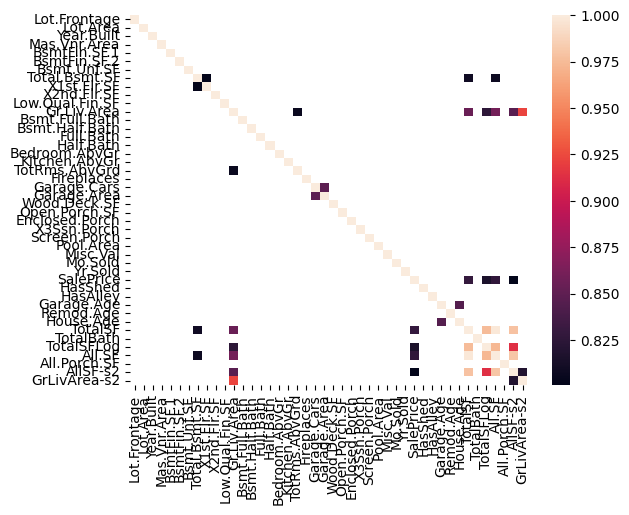

In [772]:
corr = data.corr(numeric_only=True)
sns.heatmap(corr[corr>0.8], xticklabels=corr.columns, yticklabels=corr.columns)

In [773]:
minha_data_path = DATA_DIR / 'processed' / 'ames_minha1.pkl'

In [774]:
with open(minha_data_path, 'wb') as file:
    pickle.dump(data, file)